In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [3]:
plt.rcParams["figure.figsize"]=[15,8]

In [4]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
np.set_printoptions(suppress=True)

In [5]:
df_mobile = pd.read_csv("KNN Analytics\Mobile_data.csv")
df_mobile.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1


In [6]:
df_mobile.shape

(2000, 15)

In [7]:
df_mobile.dtypes

battery_power      int64
clock_speed      float64
fc                 int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
price_range        int64
dtype: object

In [8]:
df_mobile.columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'price_range'],
      dtype='object')

In [9]:
df_features = df_mobile.iloc[:,df_mobile.columns != "price_range"]
df_target = df_mobile.iloc[:,df_mobile.columns == "price_range"]

In [10]:
df_features.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000


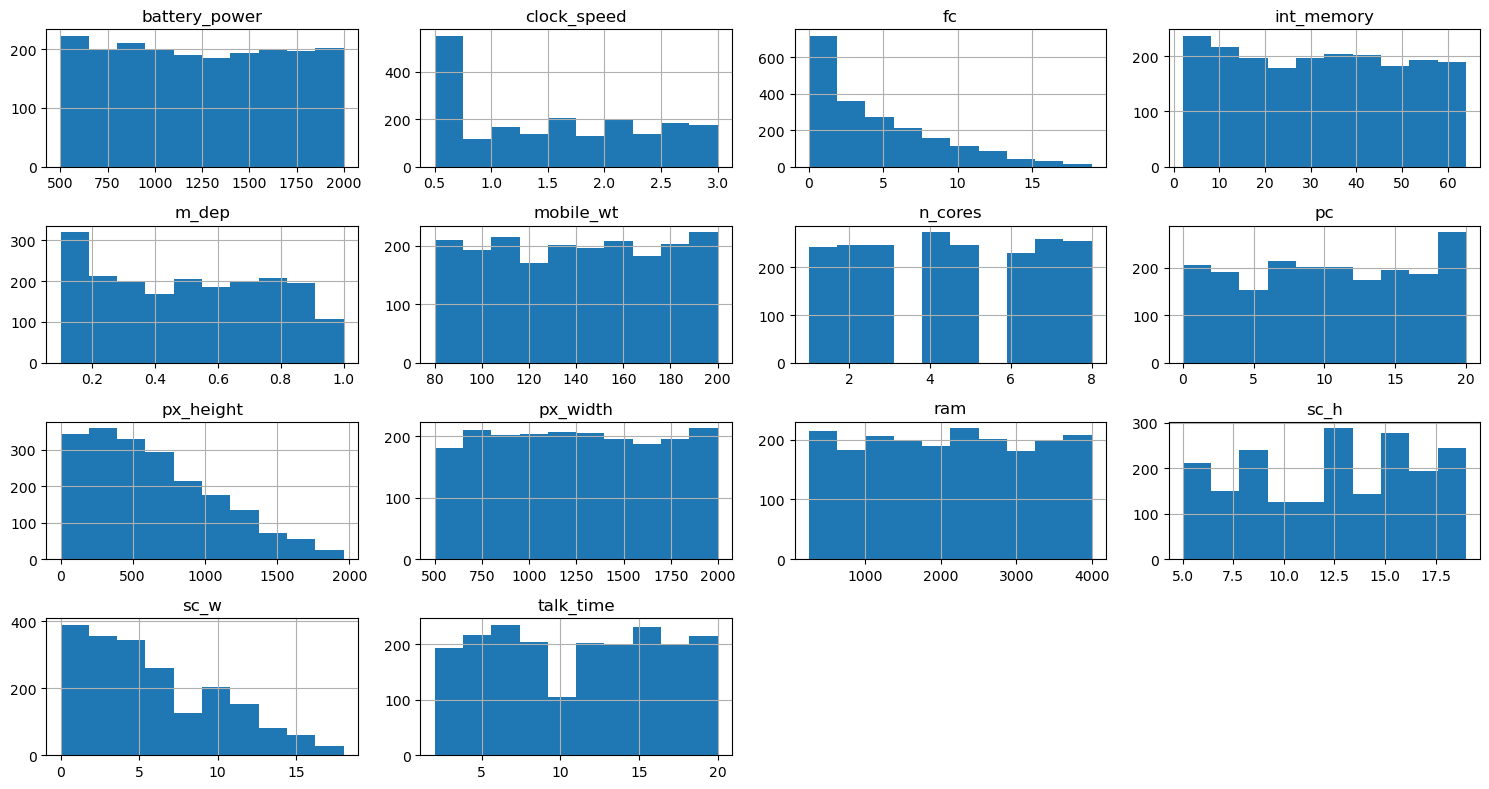

In [11]:
df_features.hist()
plt.tight_layout()
plt.show()

In [12]:
class_frequency = df_target.price_range.value_counts()
class_frequency

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

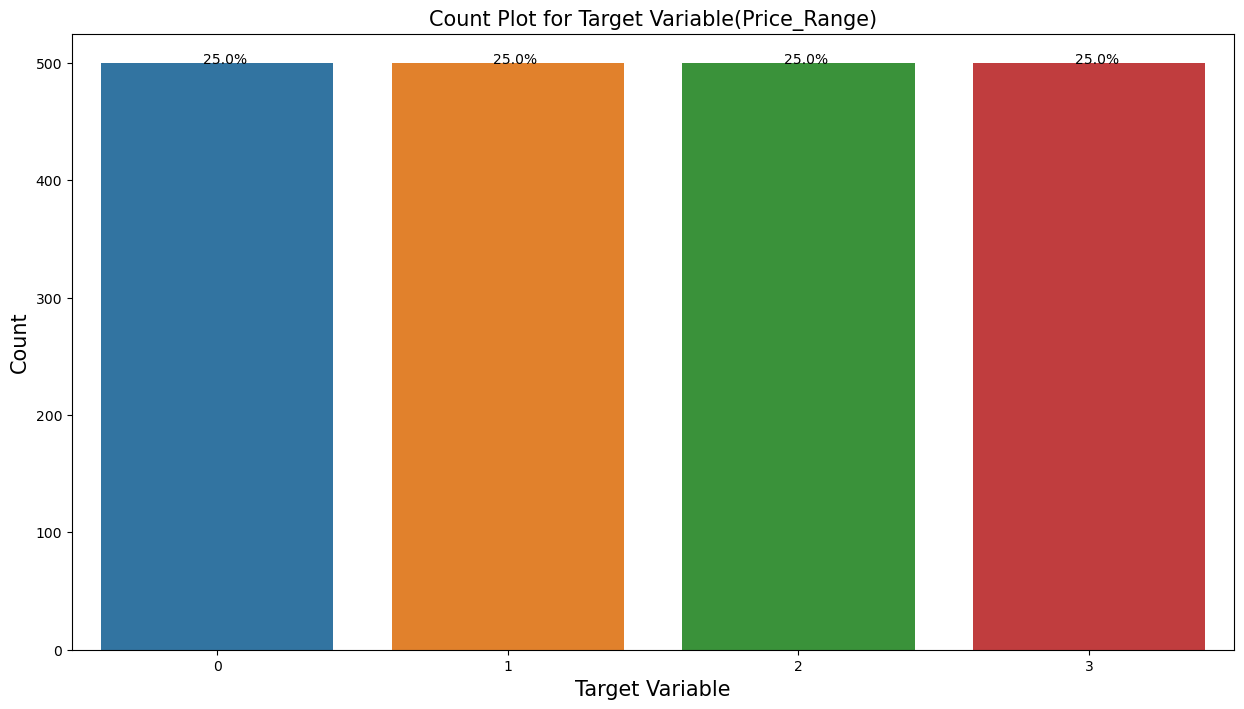

In [13]:
sns.countplot(x=df_target.price_range)

plt.text(x=-0.05,y=df_target.price_range.value_counts()[0],s=str((class_frequency[0])*100/len(df_target.price_range))+"%")
plt.text(x=0.95,y=df_target.price_range.value_counts()[1],s=str((class_frequency[1])*100/len(df_target.price_range))+"%")
plt.text(x=1.95,y=df_target.price_range.value_counts()[2],s=str((class_frequency[2])*100/len(df_target.price_range))+"%")
plt.text(x=2.95,y=df_target.price_range.value_counts()[3],s=str((class_frequency[3])*100/len(df_target.price_range))+"%")

plt.title("Count Plot for Target Variable(Price_Range)", fontsize=15)
plt.xlabel("Target Variable", fontsize=15)
plt.ylabel("Count", fontsize=15)

plt.show()

In [14]:
price_group = df_mobile.groupby("price_range")

In [15]:
price_group["ram"].mean()

price_range
0     785.314
1    1679.490
2    2582.816
3    3449.232
Name: ram, dtype: float64

<Axes: xlabel='price_range', ylabel='ram'>

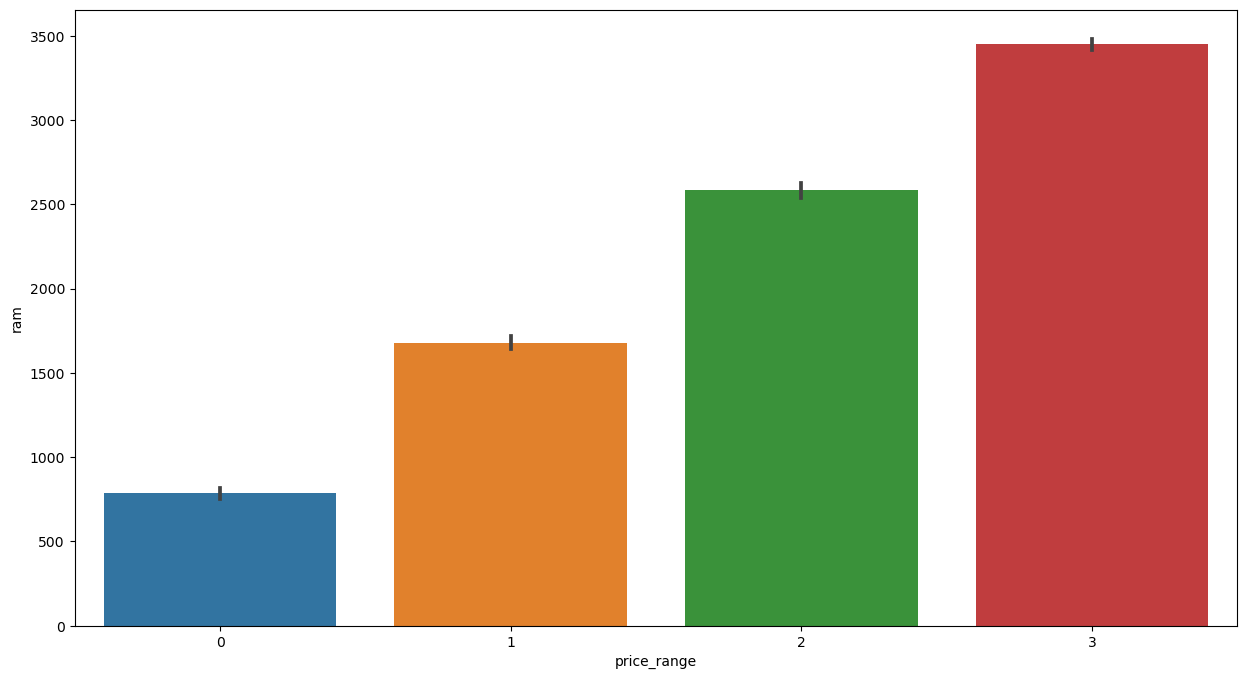

In [16]:
sns.barplot(x="price_range", y="ram", data=df_mobile)

In [17]:
corr = df_features.corr()
corr

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
battery_power,1.000000,0.011482,0.033334,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510
clock_speed,0.011482,1.000000,-0.000434,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432
fc,0.033334,-0.000434,1.000000,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829
int_memory,-0.004004,0.006545,-0.029133,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790
m_dep,0.034085,-0.014364,-0.001791,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003
mobile_wt,0.001844,0.012350,0.023618,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209
n_cores,-0.029727,-0.005724,-0.013356,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148
pc,0.031441,-0.005245,0.644595,-0.033273,0.026282,0.018844,-0.001193,1.000000,-0.018465,0.004196,0.028984,0.004938,-0.023819,0.014657
px_height,0.014901,-0.014523,-0.009990,0.010441,0.025263,0.000939,-0.006872,-0.018465,1.000000,0.510664,-0.020352,0.059615,0.043038,-0.010645
px_width,-0.008402,-0.009476,-0.005176,-0.008335,0.023566,0.000090,0.024480,0.004196,0.510664,1.000000,0.004105,0.021599,0.034699,0.006720


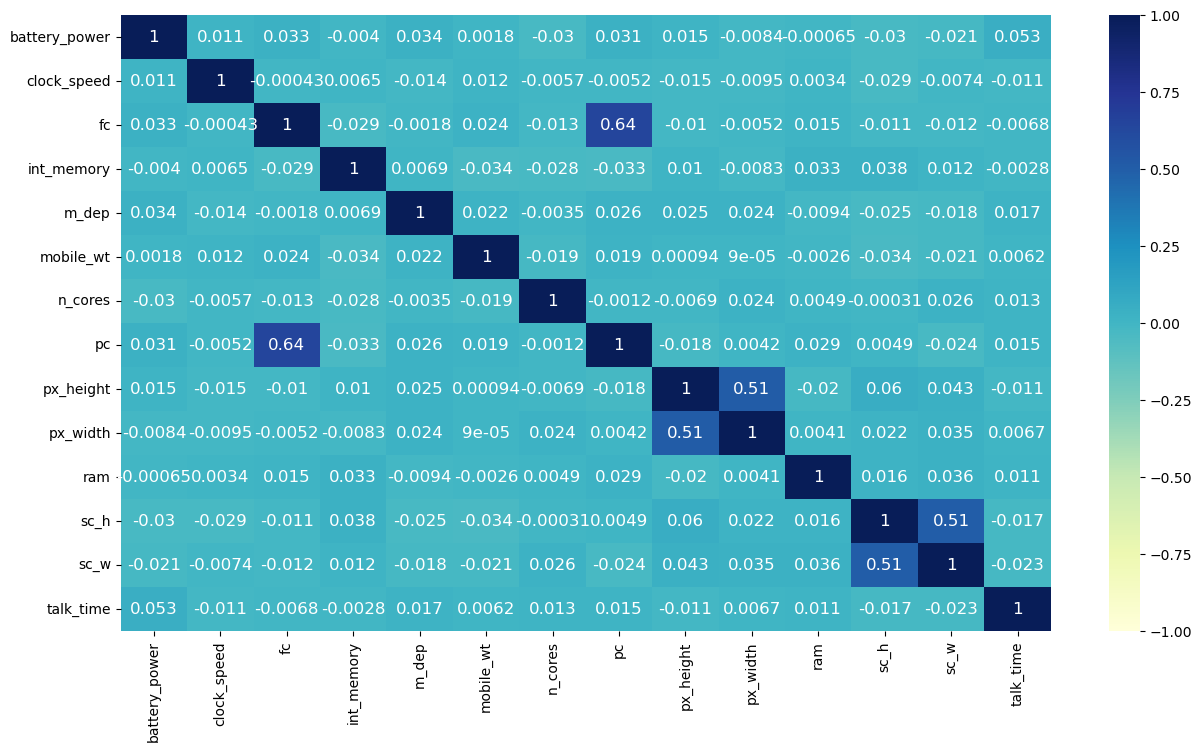

In [18]:
sns.heatmap(corr, cmap="YlGnBu", vmax=1.0, vmin=-1.0, annot=True, annot_kws={"size":12})
plt.show()

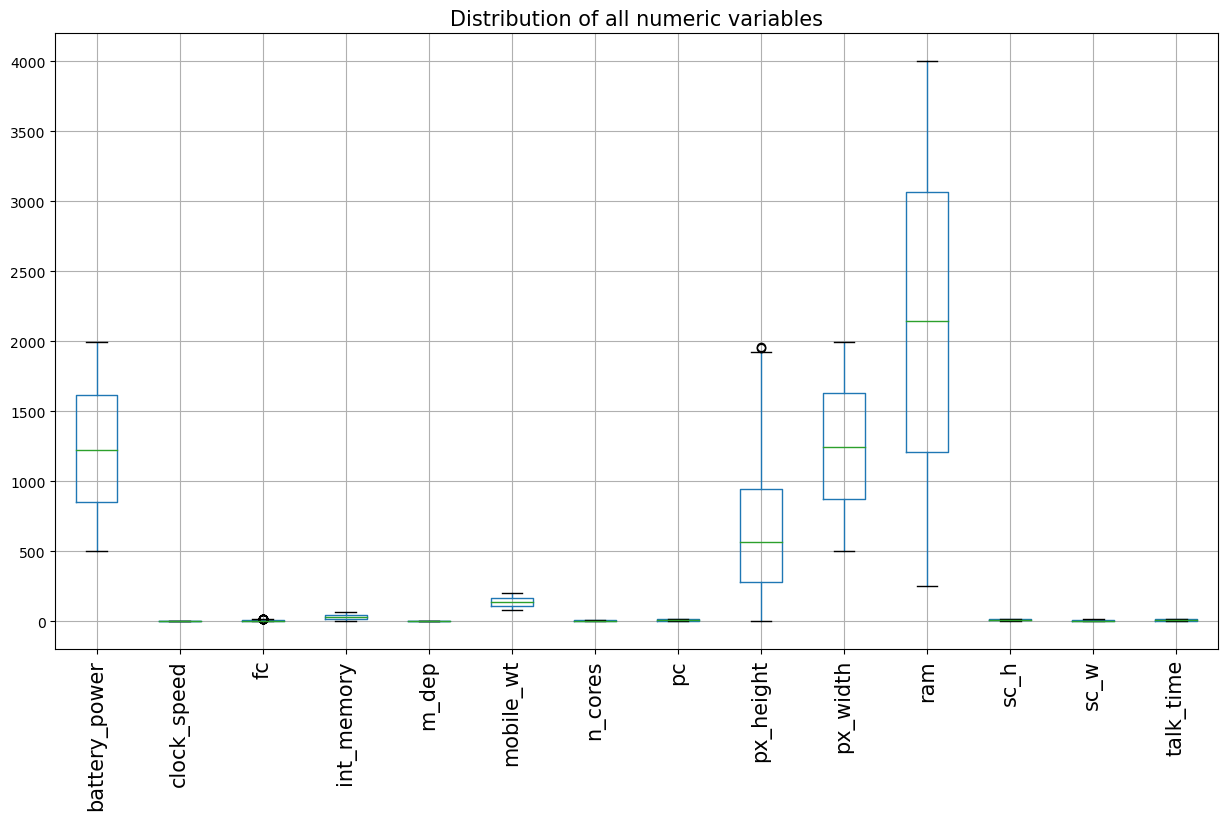

In [19]:
df_features.boxplot()

plt.title("Distribution of all numeric variables", fontsize=15)

plt.xticks(rotation = "vertical", fontsize=15)

plt.show()

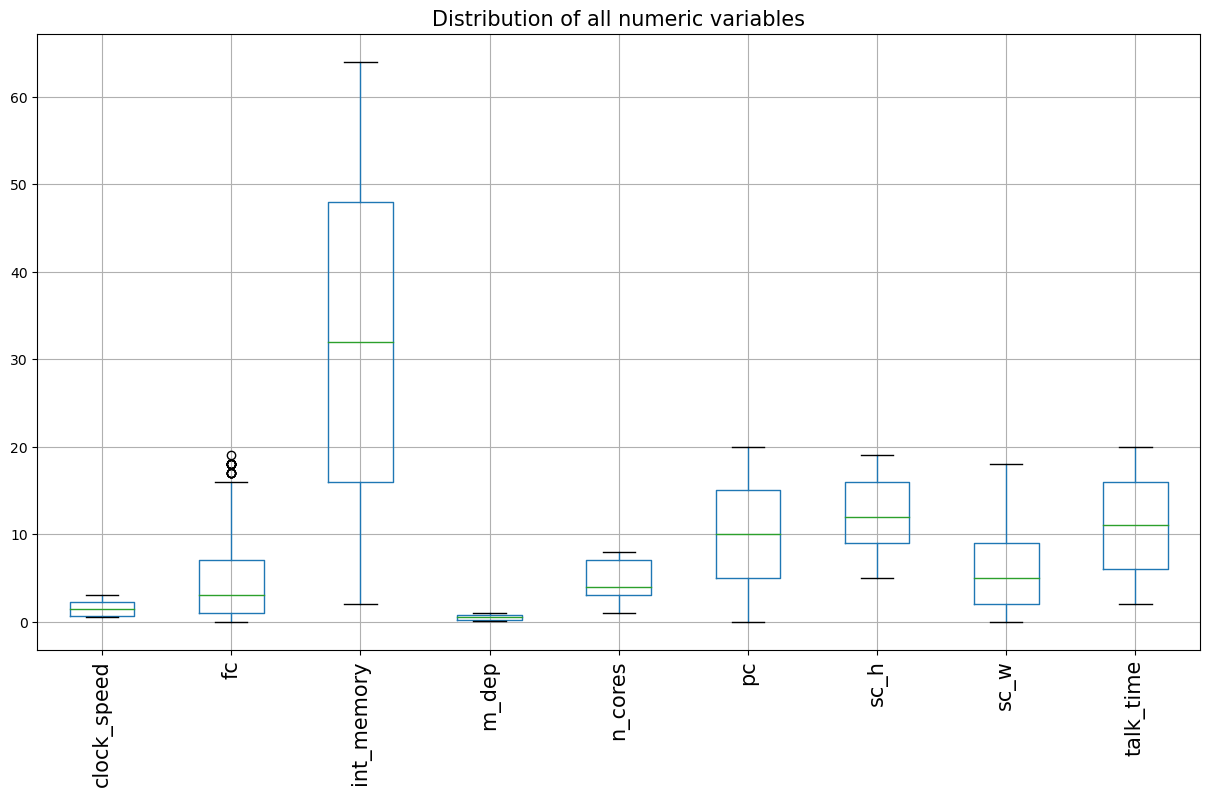

In [20]:
df_features.drop(["battery_power","mobile_wt","px_height","px_width","ram"],axis=1).boxplot()
plt.title("Distribution of all numeric variables", fontsize=15)
plt.xticks(rotation = "vertical", fontsize=15)
plt.show()

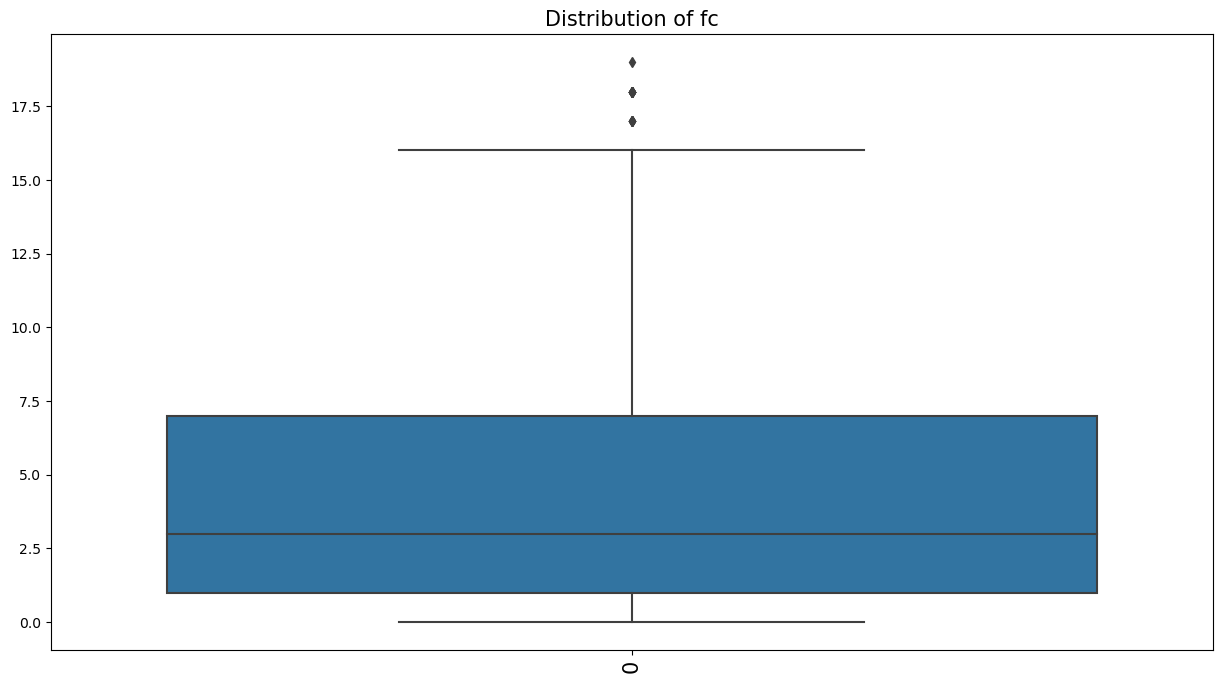

In [21]:
sns.boxplot(df_features["fc"])
plt.title("Distribution of fc", fontsize=15)
plt.xticks(rotation = "vertical", fontsize=15)
plt.show()

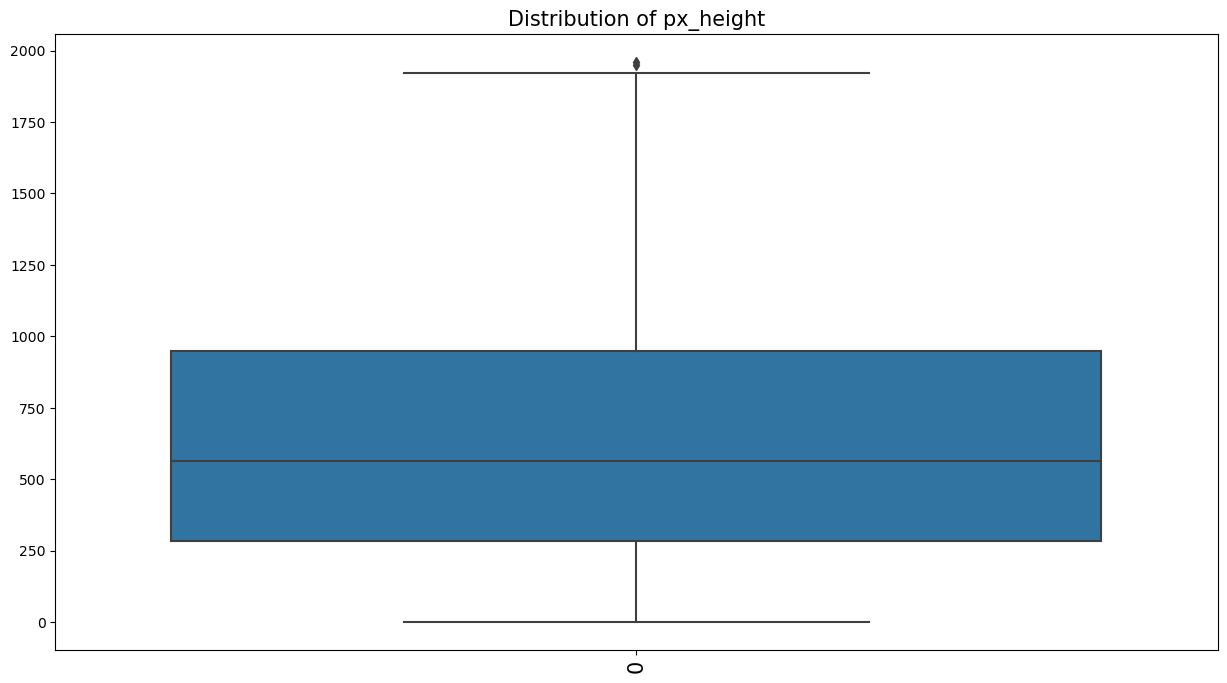

In [22]:
sns.boxplot(df_features["px_height"])
plt.title("Distribution of px_height", fontsize=15)
plt.xticks(rotation = "vertical", fontsize=15)
plt.show()

In [23]:
# Q1 = df_mobile.quantile(0.25)
# Q3 = df_mobile.quantile(0.75)
# IQR=Q3-Q1
# print(IQR)

battery_power     763.50
clock_speed         1.50
fc                  6.00
int_memory         32.00
m_dep               0.60
mobile_wt          61.00
n_cores             4.00
pc                 10.00
px_height         664.50
px_width          758.25
ram              1857.00
sc_h                7.00
sc_w                7.00
talk_time          10.00
price_range         1.50
dtype: float64


In [24]:
# df_mobile = df_mobile[~((df_mobile < (Q1 - 1.5 * IQR))|(df_mobile > (Q3 + 1.5 * IQR))).any(axis=1)]
# df_mobile = df_mobile.reset_index(drop=True)

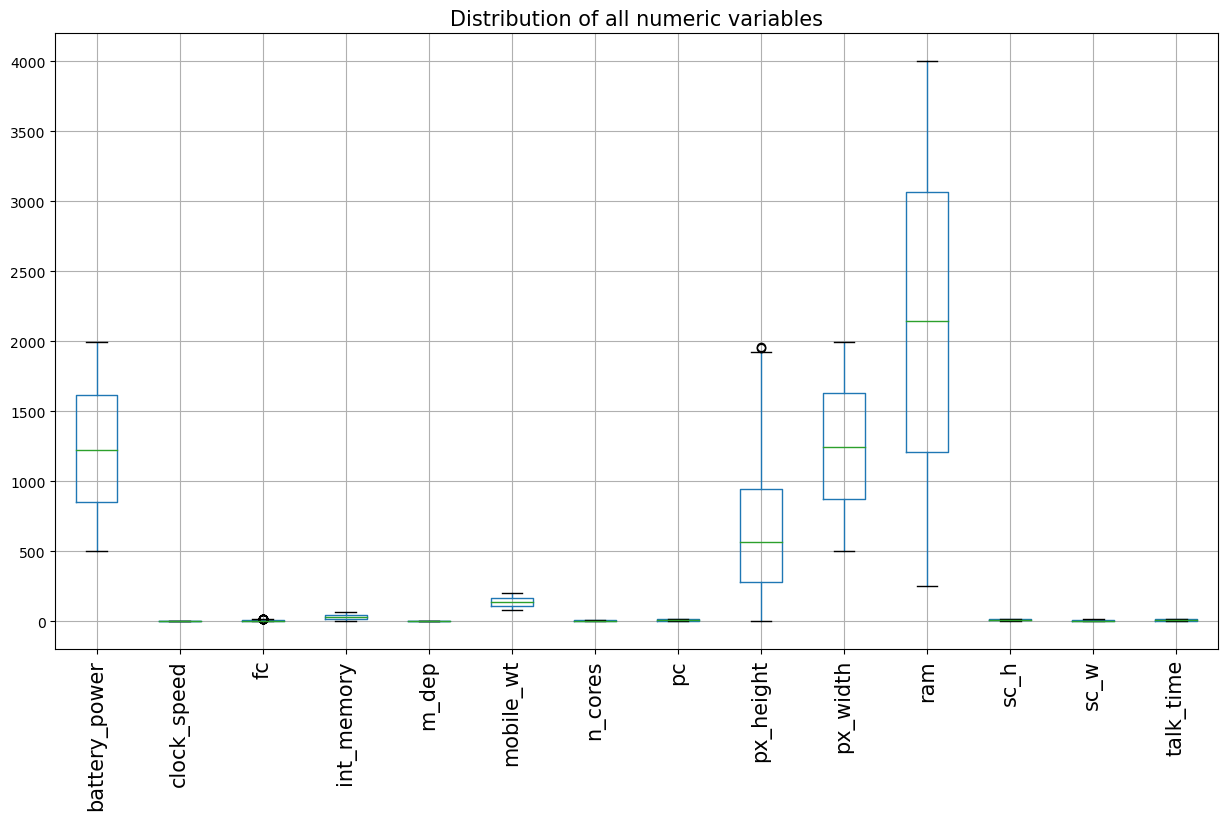

In [25]:
df_features.boxplot()

plt.title("Distribution of all numeric variables", fontsize=15)

plt.xticks(rotation = "vertical", fontsize=15)

plt.show()

In [26]:
df_features.shape

(2000, 14)

In [27]:
# Total=df_mobile.isnull().sum().sort_values(ascending=False)
# Percent=(df_mobile.isnull().sum()*100/df_mobile.isnull().count()).sort_values(ascending=False)
# missing_data = pd.concat([Total,Percent],axis=1,keys=["Total","Percentage of Missing Values"])
# missing_data

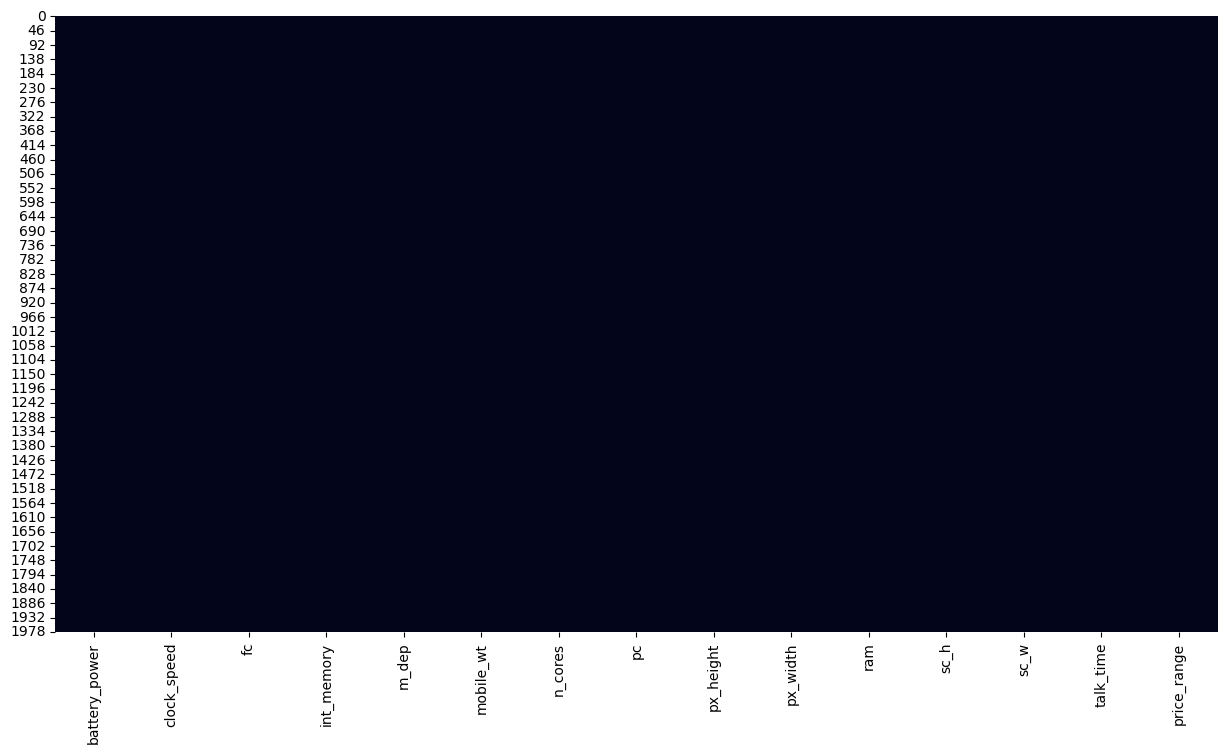

In [28]:
sns.heatmap(df_mobile.isnull(),cbar=False)
plt.show()

In [29]:
y=df_target
df_mobile=df_features

In [30]:
df_num=df_mobile.apply(lambda rec:(rec-rec.mean())/rec.std())
df_num.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,-0.902372,0.830572,-0.762304,-1.380298,0.340654,1.348911,-1.101696,-1.305424,-1.408596,-1.146497,0.391605,-0.784787,0.283032,1.462128
1,-0.495015,-1.252751,-0.992642,1.154735,0.687376,-0.120029,-0.664602,-0.645827,0.585631,1.704039,0.467200,1.113987,-0.635158,-0.734084
2,-1.537302,-1.252751,-0.531966,0.493422,1.380820,0.134210,0.209587,-0.645827,1.392336,1.074699,0.441387,-0.310094,-0.864705,-0.368048
3,-1.418964,1.198217,-0.992642,-1.214970,1.034098,-0.261274,0.646681,-0.151130,1.286428,1.236662,0.594421,0.876640,0.512579,-0.002013
4,1.325574,-0.394912,2.001753,0.658751,0.340654,0.021215,-1.101696,0.673365,1.268401,-0.091429,-0.657502,-1.022134,-0.864705,0.730057


In [31]:
X=df_num.copy()

In [32]:
X.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,-0.902372,0.830572,-0.762304,-1.380298,0.340654,1.348911,-1.101696,-1.305424,-1.408596,-1.146497,0.391605,-0.784787,0.283032,1.462128
1,-0.495015,-1.252751,-0.992642,1.154735,0.687376,-0.120029,-0.664602,-0.645827,0.585631,1.704039,0.467200,1.113987,-0.635158,-0.734084
2,-1.537302,-1.252751,-0.531966,0.493422,1.380820,0.134210,0.209587,-0.645827,1.392336,1.074699,0.441387,-0.310094,-0.864705,-0.368048
3,-1.418964,1.198217,-0.992642,-1.214970,1.034098,-0.261274,0.646681,-0.151130,1.286428,1.236662,0.594421,0.876640,0.512579,-0.002013
4,1.325574,-0.394912,2.001753,0.658751,0.340654,0.021215,-1.101696,0.673365,1.268401,-0.091429,-0.657502,-1.022134,-0.864705,0.730057


In [33]:
def get_test_report(model):
    test_pred=model.predict(X_test)
    return(classification_report(y_test, test_pred))

In [34]:
def plot_confusion_matrix(model):
    y_pred=model.predict(X_test)
    cm=confusion_matrix(y_test,y_pred)
    conf_matrix=pd.DataFrame(data=cm,columns=["Predicted:0","Predicted:1","Predicted:2","Predicted:3"],
                            index=["Actual:0","Actual:1","Actual:2","Actual:3"])
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap=ListedColormap(["Lightskyblue"]),
               cbar=False,linewidths=0.1,annot_kws={"size":25})
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=10)
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (1400, 14)
X_test (600, 14)
y_train (1400, 1)
y_test (600, 1)


In [36]:
knn_classification = KNeighborsClassifier(n_neighbors=3)
knn_model=knn_classification.fit(X_train,y_train)

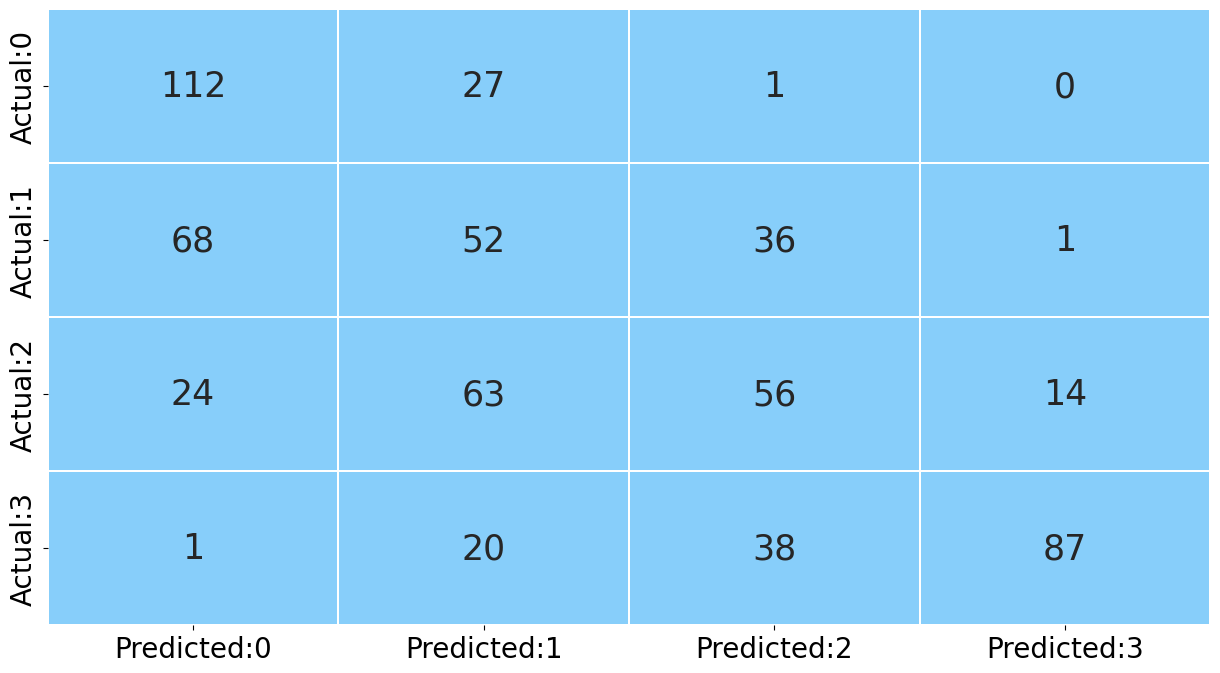

In [37]:
plot_confusion_matrix(knn_model)

In [38]:
test_report = get_test_report(knn_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.55      0.80      0.65       140
           1       0.32      0.33      0.33       157
           2       0.43      0.36      0.39       157
           3       0.85      0.60      0.70       146

    accuracy                           0.51       600
   macro avg       0.54      0.52      0.52       600
weighted avg       0.53      0.51      0.51       600



In [39]:
tuned_parameters = {"n_neighbors":np.arange(1,25,2),
                   "metric":["hamming","euclidean","manhattan","chebyshev"]}
knn_classification = KNeighborsClassifier()
knn_grid=GridSearchCV(estimator=knn_classification,
                     param_grid=tuned_parameters,
                     cv=5,
                     scoring="accuracy")
knn_grid.fit(X_train,y_train)
print("Best parameters for KNN Classifier", knn_grid.best_params_,"\n")

Best parameters for KNN Classifier {'metric': 'manhattan', 'n_neighbors': 23} 



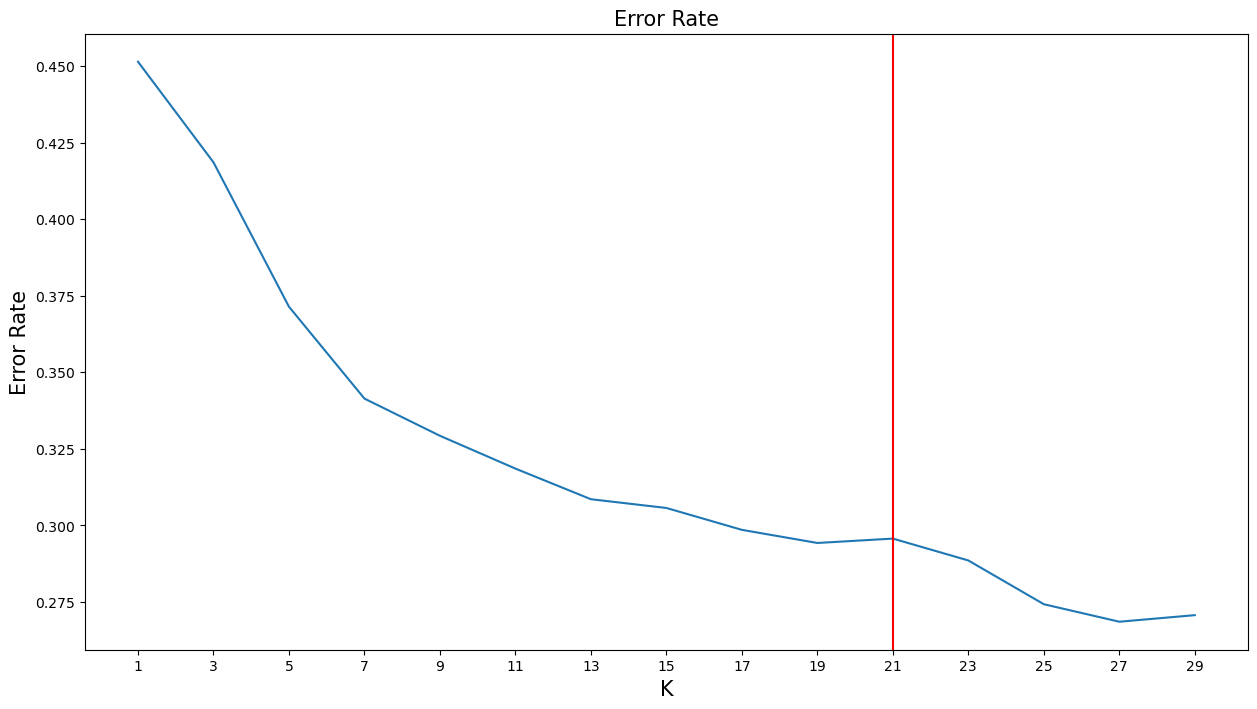

In [40]:
error_rate=[]
for i in np.arange(1,30,2):
    knn=KNeighborsClassifier(i,metric="manhattan")
    score=cross_val_score(knn,X_train,y_train,cv=5)
    score=score.mean()
    error_rate.append(1-score)
    
plt.plot(range(1,30,2),error_rate)

plt.title("Error Rate", fontsize=15)
plt.xlabel("K", fontsize=15)
plt.ylabel("Error Rate", fontsize=15)

plt.xticks(np.arange(1,30,step=2))

plt.axvline(x=21,color="red")

plt.show()

In [41]:
print("classification report for test set:\n",get_test_report(knn_grid))

classification report for test set:
               precision    recall  f1-score   support

           0       0.78      0.89      0.83       140
           1       0.68      0.61      0.64       157
           2       0.61      0.68      0.65       157
           3       0.84      0.72      0.77       146

    accuracy                           0.72       600
   macro avg       0.73      0.72      0.72       600
weighted avg       0.72      0.72      0.72       600



In [42]:
y_pred = knn_model.predict(X_test)

In [43]:
Kappa=cohen_kappa_score(y_test,y_pred)
print("Kappa Value",Kappa)

Kappa Value 0.34986890132282067


In [44]:
y_pred = knn_grid.predict(X_test)

In [45]:
Kappa=cohen_kappa_score(y_test,y_pred)
print("Kappa Value",Kappa)

Kappa Value 0.6265214249986106
